In [1]:
import rasterio
import glob
import os,sys
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib import pyplot as plt
import numpy as np
from scipy import misc
import fiona
# import geopandas as gpd
from shapely.geometry import shape
import shapely
from rasterio.mask import mask
from pyproj import Proj, transform

%matplotlib inline

In [2]:
# import the helper functions
from test_unet_helpers import *


In [3]:
# specify scene id for DG data
dg_scene_id = '1030010057062200'

# specify image for 2.0 meter analysis
gt_image_2 = '../../rasters/union_impervious_raster_2_0_0.tif' # desktop
# gt_image_2 = '../rasters/union_impervious_raster_2_0_0.tif' # laptop
#gt_image_2 = 'C:/projects/smart_cities/Denver_Sample_Sites/rasters/union_impervious_raster_2_0.tif'

# specify images for 0.5 meter analysis
gt_image_05 = '../../rasters/union_impervious_raster_0_5.tif' # desktop
# gt_image_05 = '../rasters/union_impervious_raster_0_5.tif' # laptop
#gt_image_05 = 'C:/projects/smart_cities/Denver_Sample_Sites/rasters/union_impervious_raster_0_5.tif'

# specify the shapefile
# shpfile = '../Denver_Sample_Sites/union/union_grid_index256.shp'
shpfile = '../../union/union.shp' # desktop
# shpfile = '../union/union.shp' # desktop
rows = []
with fiona.open(shpfile) as shp:
    crs = shp.crs
#     for s in shp:
#         # rows.append(shape(s['geometry']))
#         pass
        
        
    shp_bounds = shp.bounds


In [4]:
!ls ../../

rasters  smart_Cities  union


Sample Points

1) random sample row and column in GBDX image 
* get lon / lat from Affine object
* sample from rasterio object
 - get row / column from Ground Truth image, create window
 - if window is not NaN, then get it and save both

In [5]:
from gbdxtools import Interface, CatalogImage

# connect to gbdx
gbdx = Interface()

# get the dask array for the 8 band MS image
img_2m = CatalogImage(dg_scene_id, band_type='MS', bbox=shp_bounds, acomp=True)
rows, cols = img_2m.shape[1:]

# get the dask array for the Pansharpened, 4 band image
image_05m = CatalogImage(dg_scene_id, bbox=shp_bounds, acomp=True, pansharpen=True)
rowsP, colsP = image_05m.shape[1:]
pan_factorR = np.floor(rowsP/rows)
pan_factorC = np.floor(colsP/cols)

In [6]:
image_05m.shape, img_2m.shape, os.path.exists(gt_image_2)

((8, 9409, 12924), (8, 2352, 3231), True)

In [7]:
# generate the sample points
# we have some funny stuff from ArcGIS converting the polygons to a raster... so... 
# generate the points within the bounds of the shapefile / DG image array

import random

random.seed(101)

num = 10000
side = 64
coords = []
coords_pan = []
im_patches = []
im_patches_pan = []

with rasterio.open(gt_image_2, 'r') as src:
    
    for i in range(num):
        ran_row, ran_col = random.randrange(0,rows), random.randrange(0,cols) 

        try:
            r_start = ran_row - side/2
            r_end = ran_row + side/2
            c_start = ran_col - side/2
            c_end = ran_col + side/2
            #im_data = img_2m[:, r_start:r_end, c_start:c_end]

            pr_start = ran_row*pan_factorR - side/2
            pr_end = ran_row*pan_factorR + side/2
            pc_start = ran_col*pan_factorC - side/2
            pc_end = ran_col*pan_factorC + side/2
            #im_data_pan = image_05m[:, pr_start:pr_end, pc_start:pc_end]

            # append regardless and check later.

            #############################################################################################################
            ### SHOULD CHECK THE INFORMATION THRESHOLDS BELOW, BUT HERE, TO RESELECT ROWS AND COLUMNS UNTIL IT IS MET ###
            #############################################################################################################

            s_pt = calcXYfromRC(img_2m.affine, (ran_row, ran_col))
            pt_flag = checkWindow(src, s_pt)
            while pt_flag:
                ran_row, ran_col = random.randrange(0,rows), random.randrange(0,cols)
                s_pt = calcXYfromRC(img_2m.affine, (ran_row, ran_col))
                pt_flag = checkWindow(src, s_pt)

            coords.append((ran_row, ran_col))
            coords_pan.append(( int(ran_row*pan_factorR), int(ran_col*pan_factorC)))

            # check for nan
    #         if np.isnan(im_data.mean().compute()):
    #             print(i,im_data)
    #         else:
    #             coords.append((ran_row, ran_col))
    #             coords_pan.append(( int(ran_row*pan_factorR), int(ran_col*pan_factorC)))
    #             #im_patches.append(im_data)
    #             #im_patches_pan.append(im_data_pan)
        except Exception as e:
            print(e)
    #         print('{}, out of bounds'.format(i))
    #         print(r_start, r_end, c_start, c_end)

    coords_arr = np.array(coords)  

float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float divis

float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float divis

float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float division by zero
float divis

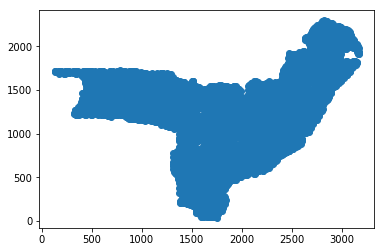

In [9]:
plt.scatter(coords_arr[:,1], coords_arr[:,0])

In [10]:
lonlat_MS = [calcXYfromRC(img_2m.affine, pair) for pair in coords]
lonlat_PAN = [calcXYfromRC(image_05m.affine, pair) for pair in coords_pan]

In [11]:
lonlat_MS[0]
        

(-105.0099797204815, 39.71693952534316)

In [13]:
# use the lonlats_* lists to sample the ground truth image. return the histogram if the window is on the border,
# which should be evident if the window extends across
with rasterio.open(gt_image_2, 'r') as src:
    #print(src.crs)

    # cull the lon/lat points by checking if they include nodata pixels
    gt_pts_MS = [assignRC(src, samp_pt) for samp_pt in lonlat_MS]

# do the same for the 0.5 meter ground truth raster
with rasterio.open(gt_image_05, 'r') as src:

    # cull the lon/lat points by checking if they include nodata pixels
    gt_pts_PAN = [assignRC(src, samp_pt) for samp_pt in lonlat_MS]




In [ ]:
## view on map
from shapely.ops import transform
from shapely.geometry import shape, Point

geoms = [Point(pair).buffer(0.00001).__geo_interface__ for pair in lonlat_MS]
    
geojson = {"type": "FetureCollection", "features": []}
for idx, geom in enumerate(geoms):
    g = {
        "type": "Feature",
        "geometry": geom,
        "properties": {"id": idx+1}
    }
    geojson['features'].append(g)
    

print(geojson['features'][0].keys())
# gbdx.vectors.map(features=geojson['features'], zoom=11)
style= {
                        "line-color": '#ff0000',
                        "line-opacity": .99,
                        "line-width": 4
                    }

mapbox_api_key = 'pk.eyJ1Ijoiam9lbWNnY3UiLCJhIjoiY2pla2I1Z2FiMHo2cDJ3bjVwMnJuZWloNiJ9.otjTJOYusw-XYsUohs7ZGg'
gbdx.vectors.map(features=geojson['features'], style=style, zoom=11, api_key=mapbox_api_key)


              

            

## now there are points to generate training samples. Load some classes that will sample the images and return the training arrays.


(64, 64)


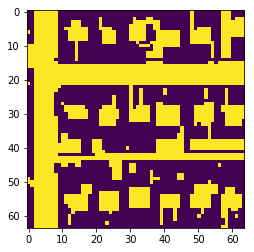

(8, 64, 64)


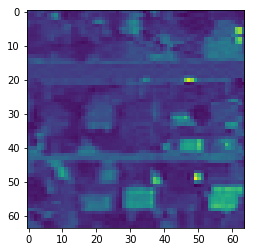

In [17]:
class DigitalGlobeSampler(Dataset):
    """DG Dataset"""
    def __init__(self, cat_img, coord_pair, window_size=64, transform=None, comb='bgr'):
        """ 
        Args:
            image_dir(string): the folder containing the DG images
            transform (callable, optional): Optional transform to  be applies
        """
        self.image = cat_img
        self.transform = transform
        self.coords = coord_pair
        self.window_size = window_size
        self.bgrn = [1,2,4,6]
        self.bgr = [1,2,4]
        
    
    def __getitem__(self, idx):
        
        # get the window
        r,c = self.coords[idx]
        r_start = int(r - self.window_size/2)
        r_end = int(r_start + self.window_size)
        c_start = int(c - self.window_size/2)
        c_end = int(c_start + self.window_size)
        
        # extract the window
        img_arr = self.image[:, r_start:r_end, c_start:c_end]

        
        if self.transform:
            img_arr = self.transform(img_arr)
        
        return img_arr

# check the images
gt_2m_rowcol = [x[1:] for x in gt_pts_MS]
gt_dataset = gtDatasetSampler(gt_image_2, gt_2m_rowcol) # 64 pixel dimension windows
# gt_dataset = gtDatasetSampler(gt_image_2, gt_pts_PAN) # 64 pixel dimension windows
sample = gt_dataset[1]
print(sample.shape)
plt.imshow(sample)
plt.show()

dg_dataset = DigitalGlobeSampler(img_2m, coords)
# dg_dataset = DigitalGlobeSampler(img_pan)
sample = dg_dataset[1]
print(sample.shape)
plt.imshow(sample[0,:,:])
plt.show()

# see that they are the same size


### main chipping code.. first ground truth, then DG